### Investigate the La Liga dataset

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
library(skimr) #provides broad overview of data frame (Tidy data lecture)
library(visdat) #provide visualisation of entire dataframe (google definition)

In [3]:
laliga_df <- read_csv("LaLigaTables.csv") %>%
 glimpse()

New names:
• `` -> `...1`
Rows: 260 Columns: 26
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Season_ID, Season, League, Team_ID, Squad, Player_ID, Top.Team.Sco...
dbl (17): ...1, Rk, MP, W, D, L, GF, GA, GD, Pts, Pts.MP, Attendance, GoalsS...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 260
Columns: 26
$ ...1            <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…
$ Season_ID       <chr> "09/10-LL", "09/10-LL", "09/10-LL", "09/10-LL", "09/10…
$ Season          <chr> "2009-2010", "2009-2010", "2009-2010", "2009-2010", "2…
$ League          <chr> "La Liga", "La Liga", "La Liga", "La Liga", "La Liga",…
$ Rk              <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…
$ Team_ID         <chr> "09/10-Barcelona", "09/10-Real Madrid", "09/10-Valenci…
$ Squad           <chr> "Barcelona", "Real Madrid", "Valencia", "Sevilla", "Ma…
$ MP              <dbl> 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38…
$ W               <dbl> 31, 31, 21, 19, 18, 17, 16, 15, 13, 13, 11, 11, 10, 10…
$ D               <dbl> 6, 3, 8, 6, 8, 7, 8, 9, 8, 8, 11, 10, 12, 11, 13, 12, …
$ L               <dbl> 1, 4, 9, 13, 12, 14, 14, 14, 17, 17, 16, 17, 16, 17, 1…
$ GF              <dbl> 98, 102, 59, 65, 59, 58, 58, 50, 57, 35, 29, 37, 43, 4…
$ GA              

### There are unwanted columns that we are not interested in as they describe individual player performance.Also it has significant NA values. Lets get rid of them.

Remove xG, xGA, XGD, XGD.90

In [4]:
laliga_df <- laliga_df %>%
  select(!xG)

In [5]:
laliga_df <- laliga_df %>%
  select(!xGA)

In [6]:
laliga_df <- laliga_df %>%
  select(!xGD)

In [7]:
laliga_df <- laliga_df %>%
  select(!xGD.90)

In [8]:
laliga_df %>% head(20)

...1,Season_ID,Season,League,Rk,Team_ID,Squad,MP,W,D,⋯,GA,GD,Pts,Pts.MP,Attendance,Player_ID,Top.Team.Scorer,GoalsScored,Goalkeeper,Notes
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,09/10-LL,2009-2010,La Liga,1,09/10-Barcelona,Barcelona,38,31,6,⋯,24,74,99,2.61,77106,09/10-Lionel Messi,Lionel Messi,34,Víctor Valdés,→ Champions League via league finish
2,09/10-LL,2009-2010,La Liga,2,09/10-Real Madrid,Real Madrid,38,31,3,⋯,35,67,96,2.53,74316,09/10-Gonzalo Higuaín,Gonzalo Higuaín,27,Iker Casillas,→ Champions League via league finish
3,09/10-LL,2009-2010,La Liga,3,09/10-Valencia,Valencia,38,21,8,⋯,40,19,71,1.87,41221,09/10-David Villa,David Villa,21,César Sánchez,→ Champions League via league finish
4,09/10-LL,2009-2010,La Liga,4,09/10-Sevilla,Sevilla,38,19,6,⋯,49,16,63,1.66,38597,09/10-Luís Fabiano,Luís Fabiano,15,Andrés Palop,→ Champions League via league finish
5,09/10-LL,2009-2010,La Liga,5,09/10-Mallorca,Mallorca,38,18,8,⋯,44,15,62,1.63,13209,09/10-Aritz Aduriz,Aritz Aduriz,12,Dudu Aouate,NA
6,09/10-LL,2009-2010,La Liga,6,09/10-Getafe,Getafe,38,17,7,⋯,48,10,58,1.53,10863,09/10-Roberto Soldado,Roberto Soldado,16,Jordi Codina,→ Europa League via league finish
7,09/10-LL,2009-2010,La Liga,7,09/10-Villarreal,Villarreal,38,16,8,⋯,57,1,56,1.47,17089,09/10-Nilmar,Nilmar,11,Diego López,→ Europa League via league finish 1
8,09/10-LL,2009-2010,La Liga,8,09/10-Athletic Club,Athletic Club,38,15,9,⋯,53,-3,54,1.42,36079,09/10-Fernando Llorente,Fernando Llorente,14,Gorka Iraizoz,NA
9,09/10-LL,2009-2010,La Liga,9,09/10-Atlético Madrid,Atlético Madrid,38,13,8,⋯,61,-4,47,1.24,40324,09/10-Diego Forlán,Diego Forlán,18,David de Gea,→ Europa League via Europa League win


### Further preprocessing

Only the 2015 to 2022 seasons will be analysed. This is because the wage dataset only covers these seasons.

In [9]:
laliga_filtered <- laliga_df %>%
  filter(!between(substring(Season, 1, 4), "2009", "2014"))

In [10]:
laliga_filtered %>% head()

...1,Season_ID,Season,League,Rk,Team_ID,Squad,MP,W,D,⋯,GA,GD,Pts,Pts.MP,Attendance,Player_ID,Top.Team.Scorer,GoalsScored,Goalkeeper,Notes
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
121,15/16-LL,2015-2016,La Liga,1,15/16-Barcelona,Barcelona,38,29,4,⋯,29,83,91,2.39,74655,15/16-Luis Suárez,Luis Suárez,40,Claudio Bravo,→ Champions League via league finish
122,15/16-LL,2015-2016,La Liga,2,15/16-Real Madrid,Real Madrid,38,28,6,⋯,34,76,90,2.37,71265,15/16-Cristiano Ronaldo,Cristiano Ronaldo,35,Keylor Navas,→ Champions League via Champions League win
123,15/16-LL,2015-2016,La Liga,3,15/16-Atlético Madrid,Atlético Madrid,38,28,4,⋯,18,45,88,2.32,46902,15/16-Antoine Griezmann,Antoine Griezmann,22,Jan Oblak,→ Champions League via league finish
124,15/16-LL,2015-2016,La Liga,4,15/16-Villarreal,Villarreal,38,18,10,⋯,35,9,64,1.68,17660,15/16-Cédric Bakambu,Cédric Bakambu,12,Alphonse Areola,→ Champions League via league finish
125,15/16-LL,2015-2016,La Liga,5,15/16-Athletic Club,Athletic Club,38,18,8,⋯,45,13,62,1.63,41917,15/16-Aritz Aduriz,Aritz Aduriz,20,Gorka Iraizoz,→ Europa League via league finish
126,15/16-LL,2015-2016,La Liga,6,15/16-Celta Vigo,Celta Vigo,38,17,9,⋯,59,-8,60,1.58,18382,15/16-Iago Aspas,Iago Aspas,13,Sergio Álvarez,→ Europa League via league finish 1


### Investigate the La Liga Wages dataset

In [12]:
laliga_wages <- read_csv("LaLigaWages.csv") %>%
 glimpse()

New names:
• `` -> `...1`
Rows: 177 Columns: 11
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Season_ID, Season, League, Team_ID, Squad, X..Estimated
dbl (5): ...1, Rk, X..Pl, Weekly_Wages_pounds, Annual_Wages_pounds

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 177
Columns: 11
$ ...1                <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…
$ Season_ID           <chr> "13/14-LL", "13/14-LL", "13/14-LL", "13/14-LL", "1…
$ Season              <chr> "2013-2014", "2013-2014", "2013-2014", "2013-2014"…
$ League              <chr> "La Liga", "La Liga", "La Liga", "La Liga", "La Li…
$ Rk                  <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…
$ Team_ID             <chr> "13/14-Barcelona", "13/14-Real Madrid", "13/14-Atl…
$ Squad               <chr> "Barcelona", "Real Madrid", "Atlético Madrid", "Va…
$ X..Pl               <dbl> 33, 35, 41, 43, 44, 32, 31, 34, 47, 31, 34, 28, 35…
$ Weekly_Wages_pounds <dbl> 2874391, 2188313, 784925, 501138, 406322, 299283, …
$ Annual_Wages_pounds <dbl> 149468309, 113792296, 40816075, 26059168, 21128735…
$ X..Estimated        <chr> "100%", "100%", "100%", "100%", "100%", "100%", "1…


In [14]:
laliga_wages %>% head(20)

...1,Season_ID,Season,League,Rk,Team_ID,Squad,X..Pl,Weekly_Wages_pounds,Annual_Wages_pounds,X..Estimated
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,13/14-LL,2013-2014,La Liga,1,13/14-Barcelona,Barcelona,33,2874391,149468309,100%
2,13/14-LL,2013-2014,La Liga,2,13/14-Real Madrid,Real Madrid,35,2188313,113792296,100%
3,13/14-LL,2013-2014,La Liga,3,13/14-Atlético Madrid,Atlético Madrid,41,784925,40816075,100%
4,13/14-LL,2013-2014,La Liga,4,13/14-Valencia,Valencia,43,501138,26059168,100%
5,13/14-LL,2013-2014,La Liga,5,13/14-Sevilla,Sevilla,44,406322,21128735,100%
6,13/14-LL,2013-2014,La Liga,6,13/14-Athletic Club,Athletic Club,32,299283,15562715,100%
7,13/14-LL,2013-2014,La Liga,7,13/14-Málaga,Málaga,31,266936,13880669,100%
8,13/14-LL,2013-2014,La Liga,8,13/14-Real Sociedad,Real Sociedad,34,263130,13682780,100%
9,13/14-LL,2013-2014,La Liga,9,13/14-Betis,Betis,47,239104,12433400,100%


In [16]:
laliga_wages_filtered <- laliga_wages %>%
  filter(!between(substring(Season, 1, 4), "2009", "2014"))

In [17]:
laliga_wages_filtered %>% head()

...1,Season_ID,Season,League,Rk,Team_ID,Squad,X..Pl,Weekly_Wages_pounds,Annual_Wages_pounds,X..Estimated
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
41,15/16-LL,2015-2016,La Liga,1,15/16-Barcelona,Barcelona,32,2806246,145924771,100%
42,15/16-LL,2015-2016,La Liga,2,15/16-Real Madrid,Real Madrid,31,2439140,126835291,100%
43,15/16-LL,2015-2016,La Liga,3,15/16-Atlético Madrid,Atlético Madrid,30,1015079,52784100,100%
44,15/16-LL,2015-2016,La Liga,4,15/16-Valencia,Valencia,39,813466,42300237,100%
45,15/16-LL,2015-2016,La Liga,5,15/16-Sevilla,Sevilla,41,552109,28709687,100%
46,15/16-LL,2015-2016,La Liga,6,15/16-Athletic Club,Athletic Club,28,398662,20730442,100%


In [18]:
average_salary_df <- laliga_wages %>%
  group_by(Squad) %>%
  summarize(average_salary = mean(Annual_Wages_pounds)) %>%
  arrange(desc(average_salary))

In [19]:
average_salary_df %>% tail()

Squad,average_salary
<chr>,<dbl>
Las Palmas,11709211
Rayo Vallecano,11172957
Elche,10235883
Sporting Gijón,8546916
Córdoba,7152477
Almería,5610043


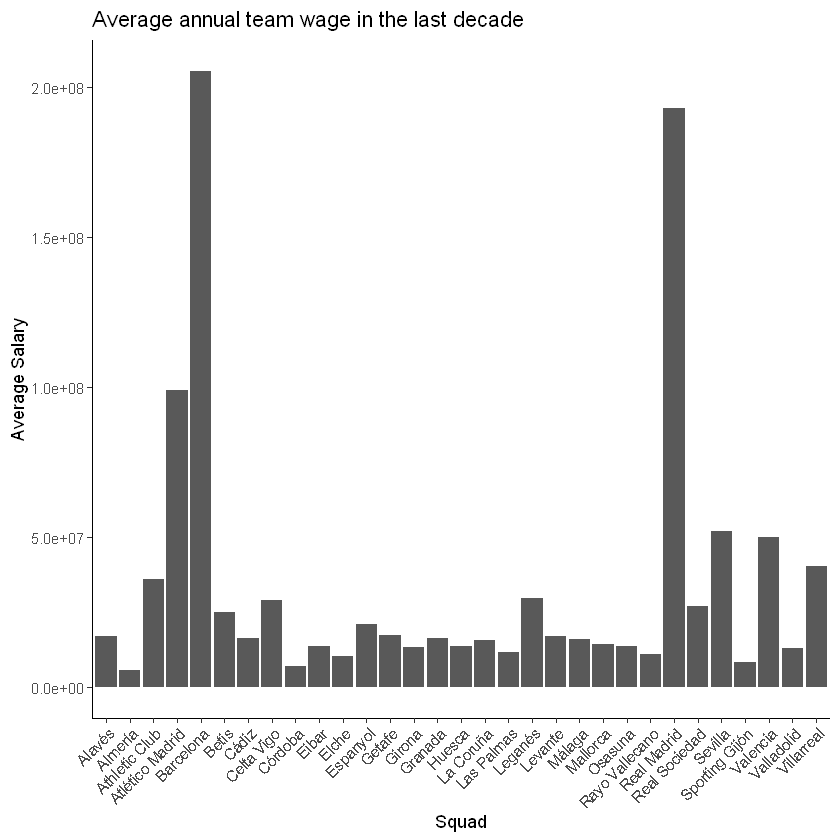

In [20]:
ggplot(data = average_salary_df,
  aes(x = Squad, y = average_salary)) +
  geom_bar(stat = "identity") +
  theme_classic() +
  xlab("Squad") +
  ylab("Average Salary") +
  ggtitle("Average annual team wage in the last decade") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Combine the laliga_filtered with laliga_wages_filtered.

In [21]:
wins_and_wages <- merge(laliga_filtered, laliga_wages_filtered, by = c('Squad', 'Season'))

In [22]:
wins_and_wages %>% head()

,Squad,Season,...1.x,Season_ID.x,League.x,Rk.x,Team_ID.x,MP,W,D,⋯,Notes,...1.y,Season_ID.y,League.y,Rk.y,Team_ID.y,X..Pl,Weekly_Wages_pounds,Annual_Wages_pounds,X..Estimated
,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,Alavés,2016-2017,149,16/17-LL,La Liga,9,16/17-Alavés,38,14,13,⋯,NA,79,16/17-LL,La Liga,19,16/17-Alavés,31,208547,10844428,100%
2,Alavés,2017-2018,174,17/18-LL,La Liga,14,17/18-Alavés,38,15,2,⋯,NA,96,17/18-LL,La Liga,17,17/18-Alavés,33,253036,13157875,100%
3,Alavés,2018-2019,191,18/19-LL,La Liga,11,18/19-Alavés,38,13,11,⋯,NA,111,18/19-LL,La Liga,13,18/19-Alavés,79,364671,18962866,100%
4,Alavés,2019-2020,216,19/20-LL,La Liga,16,19/20-Alavés,38,10,9,⋯,NA,131,19/20-LL,La Liga,14,19/20-Alavés,82,392890,20430254,100%
5,Alavés,2020-2021,236,20/21-LL,La Liga,16,20/21-Alavés,38,9,11,⋯,NA,151,20/21-LL,La Liga,14,20/21-Alavés,77,377490,19629481,97%
6,Alavés,2021-2022,260,21/22-LL,La Liga,20,21/22-Alavés,38,8,7,⋯,Relegated,171,21/22-LL,La Liga,14,21/22-Alavés,72,381763,19851686,89%


### Is there a correlation between annual wages and number of wins?

In [23]:
plot_1 <- ggplot(wins_and_wages, aes(x = Annual_Wages_pounds, y = W)) +
  geom_point(size = 5) +
  geom_smooth(
      method = 'lm', formula = y ~ x)+
  theme_classic() +
  xlab("Annual Wages") +
  ylab("Number of Wins") +
  ggtitle("Correlation Between Annual Wages and Wins in La Liga (2015 - 2022)")

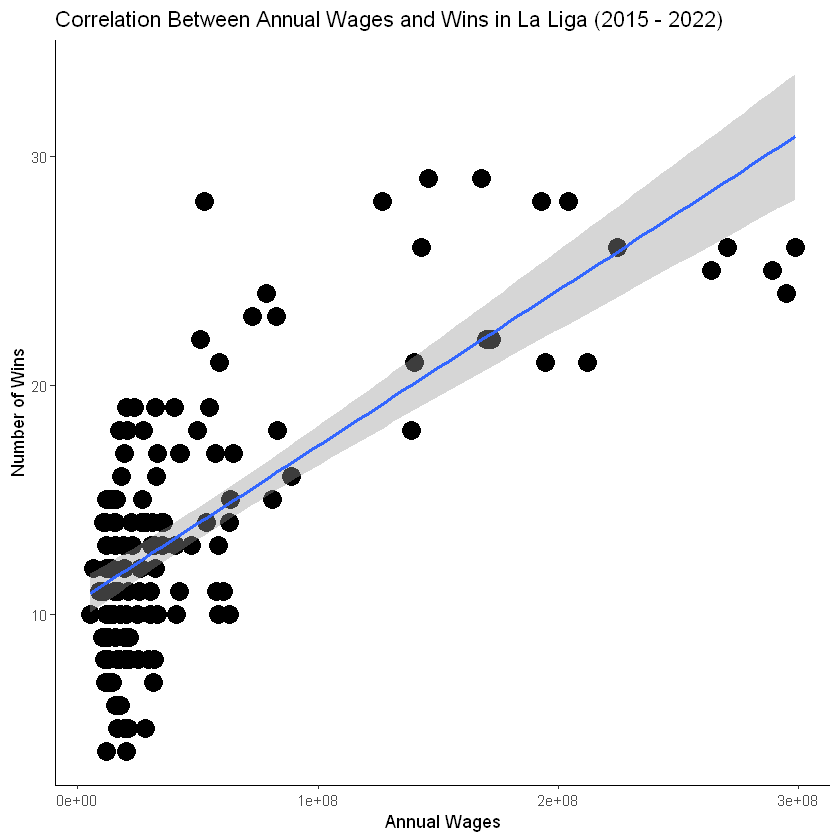

In [24]:
print(plot_1)

In [25]:
ggsave("wins_vs_wages_laliga.png", plot = plot_1)

Saving 6.67 x 6.67 in image


In [26]:
cor(wins_and_wages$Annual_Wages_pounds, wins_and_wages$W)

[1] 0.7343562

### Is there a correlation between attendance and number of wins?

In [27]:
plot_2 <- ggplot(wins_and_wages, aes(x = Attendance, y = W)) +
  geom_point(size = 5) +
  geom_smooth(
      method = 'lm', formula = y ~ x)+
  theme_classic() +
  xlab("Attendance") +
  ylab("Number of Wins") +
  ggtitle("Correlation Between Audience Attendance and Wins in La Liga (2015 - 2022)")

Warning message:
"Removed 16 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 16 rows containing missing values (`geom_point()`)."


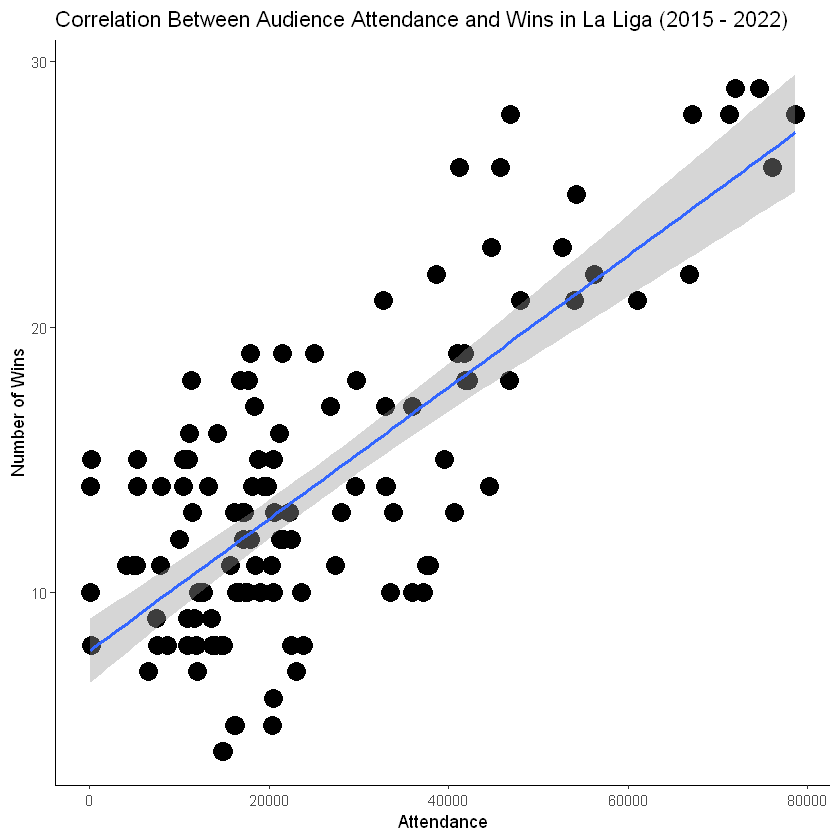

In [29]:
print(plot_2)

In [30]:
ggsave("attendace_wins_laliga.png", plot = plot_2)

Saving 6.67 x 6.67 in image
Warning message:
"Removed 16 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 16 rows containing missing values (`geom_point()`)."


The graph indicates that there is positive correlation between attendance and wins. However, it is not very insightful. This would have been better if there is data for home and away game stats for each team. 

### Is there a correlation between annual wage and attendance?

Warning message:
"Removed 16 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 16 rows containing missing values (`geom_point()`)."


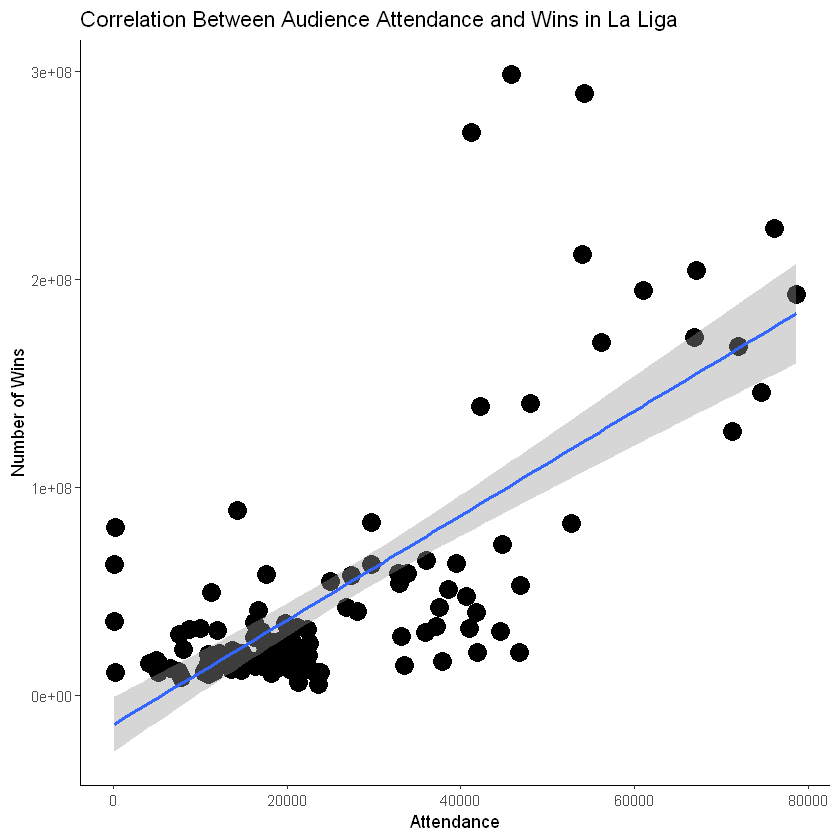

In [31]:
ggplot(wins_and_wages, aes(x = Attendance, y = Annual_Wages_pounds)) +
  geom_point(size = 5) +
  geom_smooth(
      method = 'lm', formula = y ~ x)+
  theme_classic() +
  xlab("Attendance") +
  ylab("Number of Wins") +
  ggtitle("Correlation Between Audience Attendance and Wins in La Liga")

### Is there a correlation between Goal Difference (GD) and wins?

In [32]:
plot_3 <- ggplot(wins_and_wages, aes(x = GD, y = W)) +
  geom_point(size = 5) +
  geom_smooth(
      method = 'lm', formula = y ~ x)+
  theme_classic() +
  xlab("Goal Difference") +
  ylab("Number of Wins") +
  ggtitle("Correlation Between Goal Difference and Wins in La Liga (2015 - 2022)")

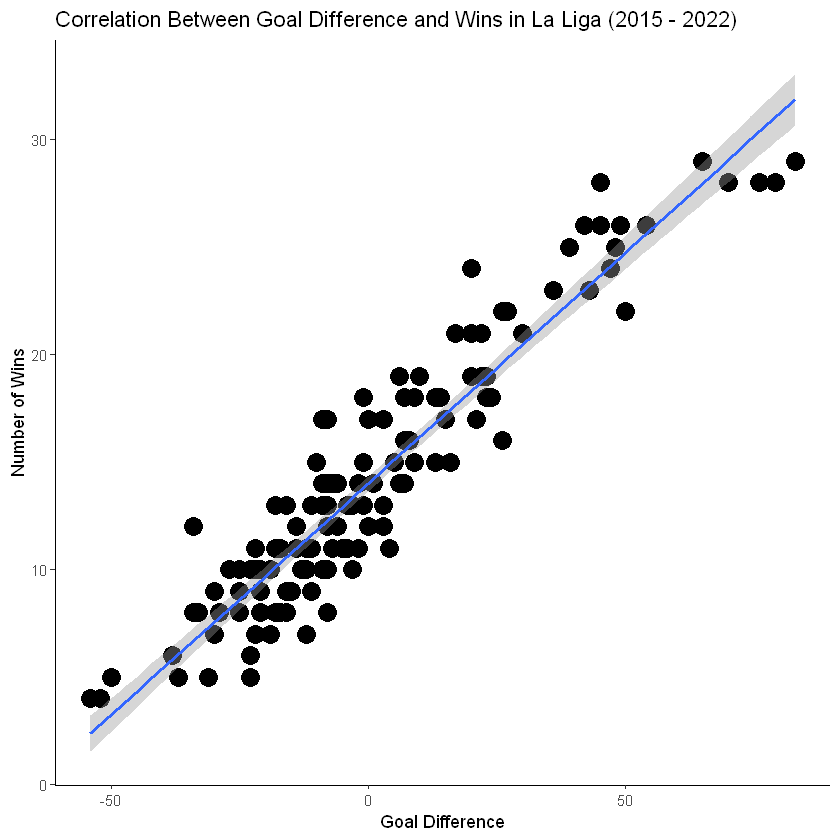

In [33]:
print(plot_3)

In [34]:
ggsave("goals_wins_laliga.png", plot = plot_3)

Saving 6.67 x 6.67 in image


In [35]:
cor(wins_and_wages$GD, wins_and_wages$W)

[1] 0.9359662

### Which league allows more goals?

Load Premier League Stats to compare it with the La Liga Stats

In [37]:
premier_df <- read_csv("PremierLeagueTables.csv") %>%
 glimpse()

New names:
• `` -> `...1`
Rows: 260 Columns: 26
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Season_ID, Season, League, Team_ID, Squad, Player_ID, Top.Team.Sco...
dbl (17): ...1, Rk, MP, W, D, L, GF, GA, GD, Pts, Pts.MP, Attendance, GoalsS...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 260
Columns: 26
$ ...1            <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…
$ Season_ID       <chr> "09/10-PL", "09/10-PL", "09/10-PL", "09/10-PL", "09/10…
$ Season          <chr> "2009-2010", "2009-2010", "2009-2010", "2009-2010", "2…
$ League          <chr> "Premier League", "Premier League", "Premier League", …
$ Rk              <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…
$ Team_ID         <chr> "09/10-Chelsea", "09/10-Manchester Utd", "09/10-Arsena…
$ Squad           <chr> "Chelsea", "Manchester Utd", "Arsenal", "Tottenham", "…
$ MP              <dbl> 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38…
$ W               <dbl> 27, 27, 23, 21, 18, 17, 18, 16, 13, 13, 11, 12, 11, 10…
$ D               <dbl> 5, 4, 6, 7, 13, 13, 9, 13, 11, 11, 14, 10, 11, 9, 11, …
$ L               <dbl> 6, 7, 9, 10, 7, 8, 11, 9, 14, 14, 13, 16, 16, 19, 18, …
$ GF              <dbl> 103, 86, 83, 67, 73, 52, 61, 60, 38, 41, 34, 39, 48, 4…
$ GA              

Filter, include only 2015-2022

In [38]:
premier_filtered <- premier_df %>%
  filter(!between(substring(Season, 1, 4), "2009", "2014"))

Get some summary statistics for premier league

In [39]:
premier_summary <- premier_filtered %>%
  summarise(mean_GF_PL = mean(GF),
            median_GF_PL = median(GF)
            )

In [40]:
premier_summary %>% print

# A tibble: 1 × 2
  mean_GF_PL median_GF_PL
       <dbl>        <dbl>
1       52.2           48


In [41]:
laliga_summary <- wins_and_wages %>%
  summarise(mean_GF_LL = mean(GF),
            median_GF_LL = median(GF)
            )

In [42]:
laliga_summary

mean_GF_LL,median_GF_LL
<dbl>,<dbl>
50.41606,46


Merge data

In [43]:
summary_statistics <- bind_rows(
  data.frame(League = "La Liga", mean_GF = laliga_summary$mean_GF_LL, median_GF = laliga_summary$median_GF_LL),
  data.frame(League = "Premier League", mean_GF = premier_summary$mean_GF_PL, median_GF = premier_summary$median_GF_PL)
)

In [44]:
summary_statistics %>% print

          League  mean_GF median_GF
1        La Liga 50.41606        46
2 Premier League 52.20714        48


In [51]:
plot_4 <- ggplot(summary_statistics, aes(x = League, y = mean_GF, fill = League)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8)) +
  labs(title = "Mean Goals Scored Comparison (2015 - 2022 Season)",
       y = "Mean Goals Scored",
       x = "League") +
  theme_minimal()

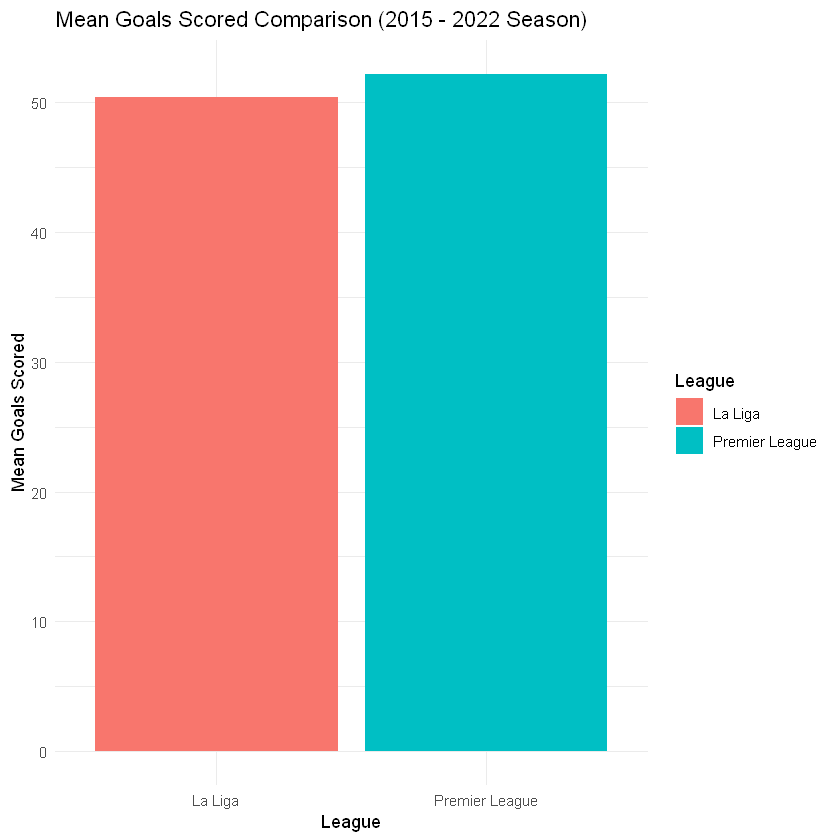

In [52]:
print(plot_4)

In [53]:
ggsave("mean_goals.png", plot = plot_4)

Saving 6.67 x 6.67 in image


In [54]:
plot_5 <- ggplot(summary_statistics, aes(x = League, y = median_GF, fill = League)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8)) +
  labs(title = "Median Goals Scored Comparison (2015 - 2022 Season)",
       y = "Median Goals Scored",
       x = "League") +
  theme_minimal()

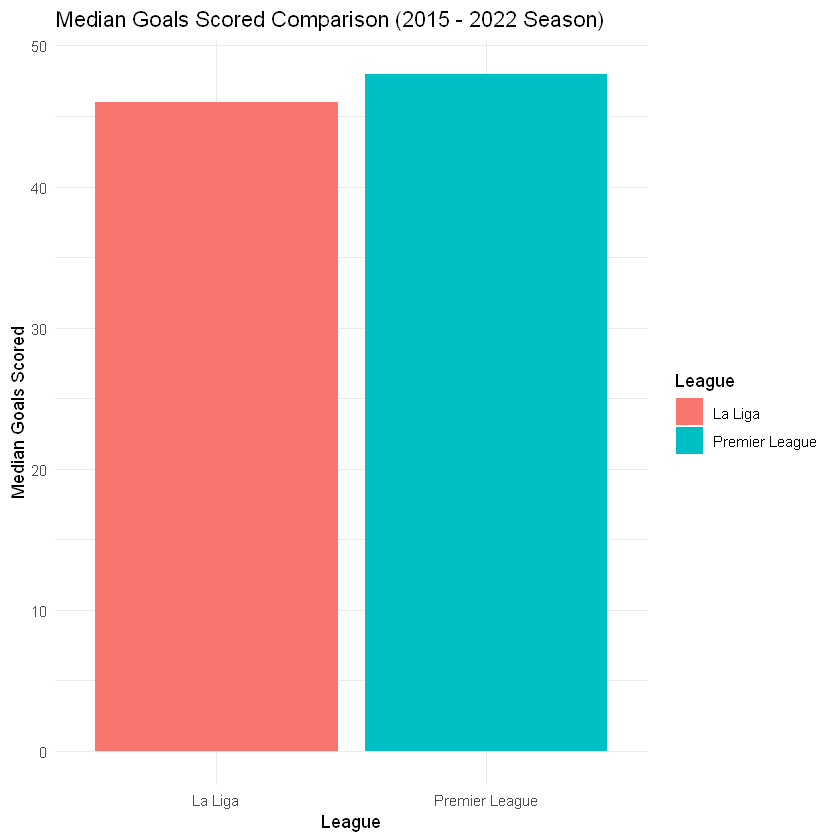

In [55]:
print(plot_5)

In [56]:
ggsave("median_goals.png", plot = plot_5)

Saving 6.67 x 6.67 in image


END OF NOTEBOOK

written by jjm148 for DATA422